# Steven Granaturov Week 3 Assignment #


| Model             | Train  | Test  | Heaviest Weights                                             |
|-------------------|--------|-------|-------------------------------------------------------------|
| No Regularization |97.539% |97.538%|[diff_srv_rate, serror_rate, dst_host_serror_rate]            |
| L1 Regularization |99.831% |99.824%|[srv_diff_host_rate, dst_host_diff_srv_rate, same_srv_rate]   |
| L2 Regularization |97.540% |97.538%|[diff_srv_rate, serror_rate, dst_host_serror_rate]            |


| L2 Regularization | C=.001 | C=.01 | C=.1   | C=1    | C=10   | C=100  |
|-------------------|--------|-------|--------|--------|--------|--------|
| Train Score       |97.325% |97.646%|98.015% |97.539% |97.114% |97.508% |
| Test Score        |97.331% |97.654%|97.998% |97.538% |97.106% |97.526% |

#### Imports and Load Data ####

In [36]:
from sklearn import datasets
from sklearn import metrics
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("kddcup99.csv")

X = df.iloc[: , :41]
y = df.iloc[:, 41:]

print(y)

IC = np.unique(y)

print(IC)

df2 = df.copy()

         label
0       normal
1       normal
2       normal
3       normal
4       normal
...        ...
494015  normal
494016  normal
494017  normal
494018  normal
494019  normal

[494020 rows x 1 columns]
['back' 'buffer_overflow' 'ftp_write' 'guess_passwd' 'imap' 'ipsweep'
 'land' 'loadmodule' 'multihop' 'neptune' 'nmap' 'normal' 'perl' 'phf'
 'pod' 'portsweep' 'rootkit' 'satan' 'smurf' 'spy' 'teardrop'
 'warezclient' 'warezmaster']


#### Replace labels from string to unique integers classifying each label ####

In [37]:
vals, df2['label'] = np.unique(df['label'].values, return_inverse=True)

y = df2.iloc[:, 41:]

print(vals)
print(y)

print(y.shape)

['back' 'buffer_overflow' 'ftp_write' 'guess_passwd' 'imap' 'ipsweep'
 'land' 'loadmodule' 'multihop' 'neptune' 'nmap' 'normal' 'perl' 'phf'
 'pod' 'portsweep' 'rootkit' 'satan' 'smurf' 'spy' 'teardrop'
 'warezclient' 'warezmaster']
        label
0          11
1          11
2          11
3          11
4          11
...       ...
494015     11
494016     11
494017     11
494018     11
494019     11

[494020 rows x 1 columns]
(494020, 1)


#### Replace protocol_type, service, flag strings to unique integers ####

In [38]:
vals1, df2['protocol_type'] = np.unique(df2['protocol_type'].values, return_inverse=True)
vals2, df2['service'] = np.unique(df2['service'].values, return_inverse=True)
vals3, df2['flag'] = np.unique(df2['flag'].values, return_inverse=True)

X = df2.iloc[: , :41]


#### Scale data ####

In [39]:
from sklearn.preprocessing import scale
# Scale the data
Xs = scale(X)

#### Dimensions of Xw ####

In [40]:
x_labels_w = X.columns[:]
Xw = np.array(X[x_labels_w].values)

print("Matrix dimensions of Xw is " + str(Xw.shape))

Matrix dimensions of Xw is (494020, 41)


#### Determine heaviest weights for each probe attack ####

c:\Users\steve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\steve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

['diff_srv_rate', 'serror_rate', 'dst_host_serror_rate']
['diff_srv_rate', 'serror_rate', 'dst_host_serror_rate']
['diff_srv_rate', 'serror_rate', 'dst_host_serror_rate']
['diff_srv_rate', 'serror_rate', 'dst_host_serror_rate']


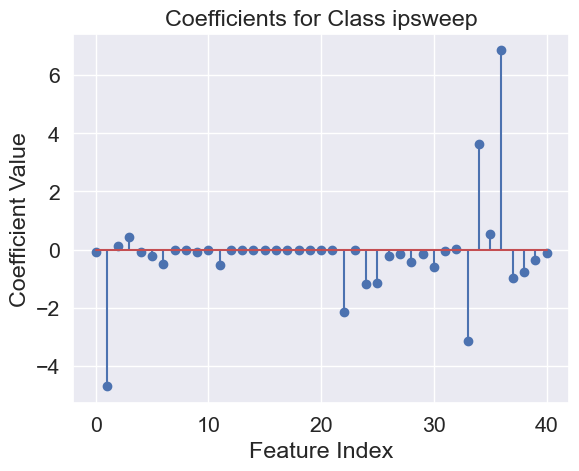

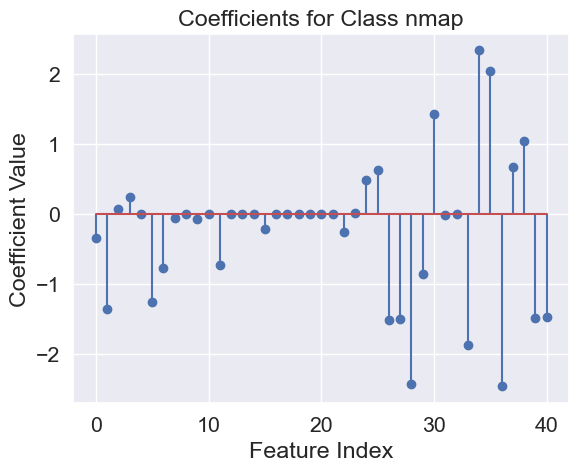

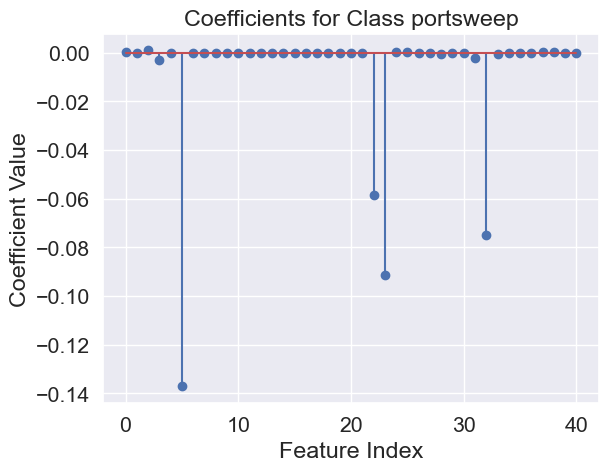

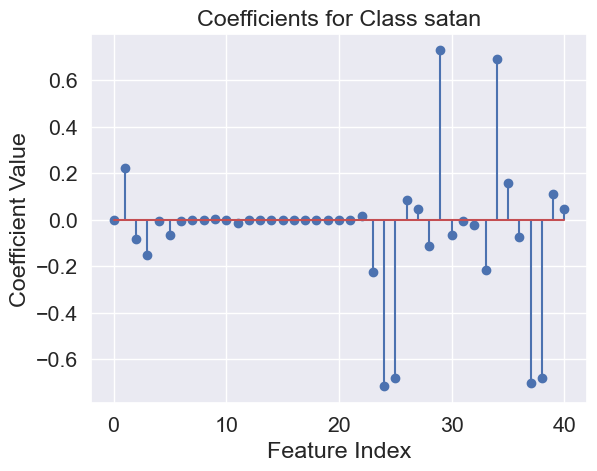

In [41]:
# Index 5: ipsweep
# Index 10: nmap
# Index 15: portsweep
# Index 17: satan

# Create a list to store the coefficients for each classifier
coefficients = []
coefList = [5, 10, 15, 17]

# Fit a logistic regression model for each class
for class_label in coefList:
    # Create a binary label vector for the current class
    y_binary = (y == class_label).astype(int)
    
    # Fit the logistic regression model
    logReg_w = LogisticRegression(max_iter=100)
    logReg_w.fit(Xw, y_binary.values.ravel())
    
    # Get the coefficients for this classifier and flatten them
    W = logReg_w.coef_.flatten()
    
    # Append the coefficients to the list
    coefficients.append(W)

# Convert the list of coefficients to a NumPy array
coefficients = np.array(coefficients)

# Plot the coefficients for each classifier
for i in range(coefficients.shape[0]):
    plt.figure()
    plt.stem(coefficients[i])
    plt.title(f'Coefficients for Class {IC[coefList[i]]}')
    plt.xlabel('Feature Index')
    plt.ylabel('Coefficient Value')

    idx1=np.argsort(np.abs(W))[-1]
    idx2=np.argsort(np.abs(W))[-2]
    idx3=np.argsort(np.abs(W))[-3]

    heavy=[x_labels_w[idx1], x_labels_w[idx2],x_labels_w[idx3]]
    print(heavy)

#### Train test and split - 80% training, 20% testing ####

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

from sklearn.preprocessing import scale
# Scale the data
Xs = scale(X_train)

#### Fit model ####

In [43]:
logReg = LogisticRegression(max_iter=100)

logReg.fit(X_train, y_train.values.ravel())

c:\Users\steve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Obtain model accuracy scores ####

In [44]:
from sklearn.metrics import accuracy_score

y_train_pred = logReg.predict(X_train)
y_test_pred = logReg.predict(X_test)

train_score = accuracy_score(y_train, y_train_pred)
test_score = accuracy_score(y_test, y_test_pred)

print("Train score: ", train_score)
print("Test score: ", test_score)

Train score:  0.9753957329662767
Test score:  0.9753856119185458


#### Plot confusion matrix ####

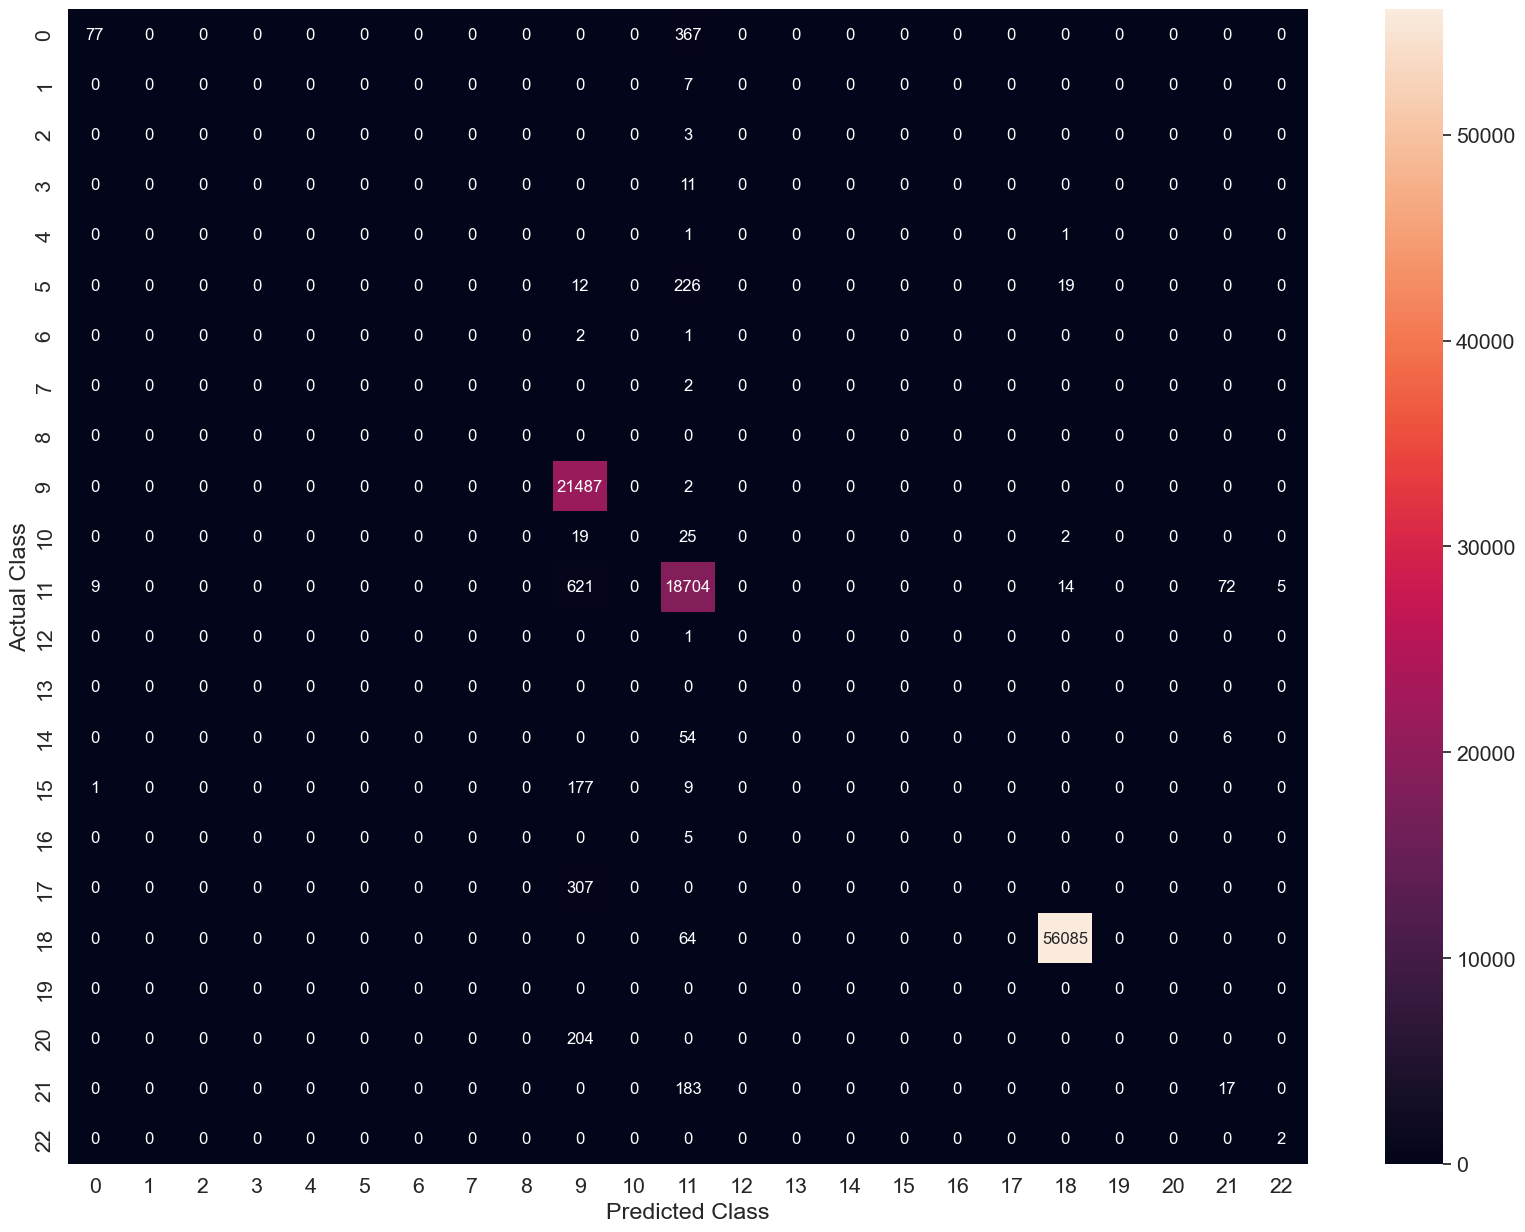

In [45]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


labels1 = ['back' 'buffer_overflow' 'ftp_write' 'guess_passwd' 'imap' 'ipsweep'
 'land' 'loadmodule' 'multihop' 'neptune' 'nmap' 'normal' 'perl' 'phf'
 'pod' 'portsweep' 'rootkit' 'satan' 'smurf' 'spy' 'teardrop'
 'warezclient' 'warezmaster']

labels2 = np.arange(23)

C = confusion_matrix(y_test, y_test_pred, labels=labels2)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.4)
sns.heatmap(C, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels2, yticklabels=labels2)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
 
plt.show()

# L1 Regularization #

#### Determine heaviest weights for each probe attack ####

c:\Users\steve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\steve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\steve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\steve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


['srv_diff_host_rate', 'dst_host_diff_srv_rate', 'same_srv_rate']
['srv_diff_host_rate', 'dst_host_diff_srv_rate', 'same_srv_rate']
['srv_diff_host_rate', 'dst_host_diff_srv_rate', 'same_srv_rate']
['srv_diff_host_rate', 'dst_host_diff_srv_rate', 'same_srv_rate']


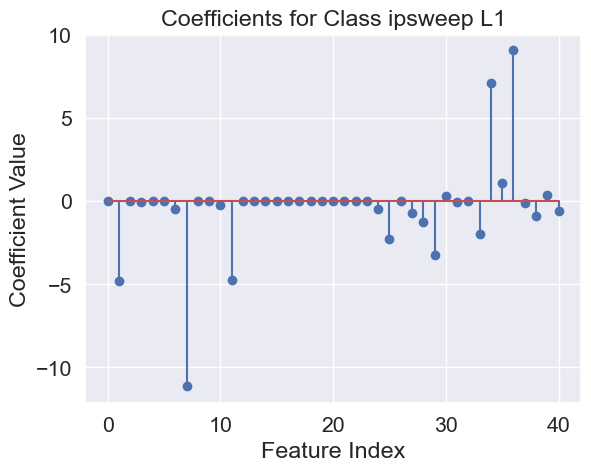

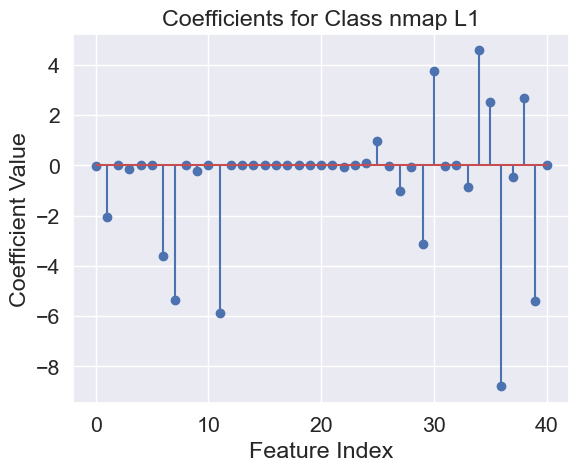

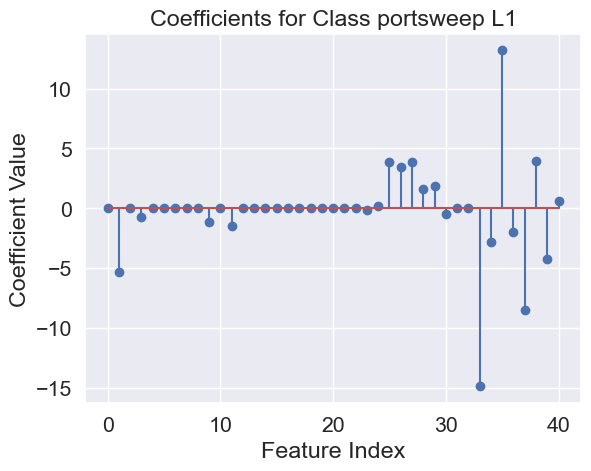

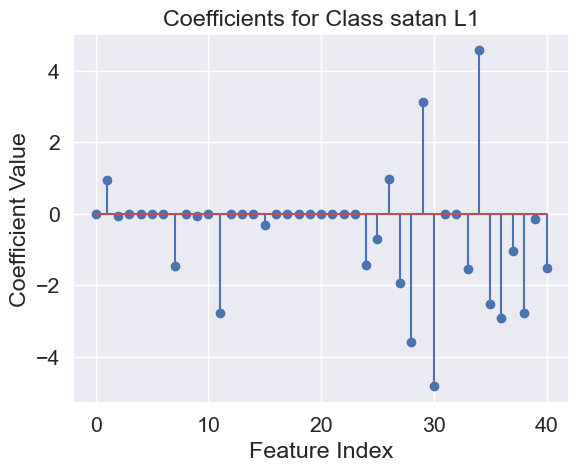

In [46]:
# Index 5: ipsweep
# Index 10: nmap
# Index 15: portsweep
# Index 17: satan

# Create a list to store the coefficients for each classifier
coefficients = []
coefList = [5, 10, 15, 17]

# Fit a logistic regression model for each class
for class_label in coefList:
    # Create a binary label vector for the current class
    y_binary = (y == class_label).astype(int)
    
    # Fit the logistic regression model
    logReg_w = LogisticRegression(penalty='l1', max_iter=100, solver='liblinear')
    logReg_w.fit(Xw, y_binary.values.ravel())
    
    # Get the coefficients for this classifier and flatten them
    W = logReg_w.coef_.flatten()
    
    # Append the coefficients to the list
    coefficients.append(W)

# Convert the list of coefficients to a NumPy array
coefficients = np.array(coefficients)

# Plot the coefficients for each classifier
for i in range(coefficients.shape[0]):
    plt.figure()
    plt.stem(coefficients[i])
    plt.title(f'Coefficients for Class {IC[coefList[i]]} L1')
    plt.xlabel('Feature Index')
    plt.ylabel('Coefficient Value')

    idx1=np.argsort(np.abs(W))[-1]
    idx2=np.argsort(np.abs(W))[-2]
    idx3=np.argsort(np.abs(W))[-3]

    heavy=[x_labels_w[idx1], x_labels_w[idx2],x_labels_w[idx3]]
    print(heavy)

#### Fit model ####

In [47]:
logReg = LogisticRegression(penalty='l1', max_iter=100, solver='liblinear')

logReg.fit(X_train, y_train.values.ravel())


c:\Users\steve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression(penalty='l1', solver='liblinear')

#### Obtain model accuracy scores ####

In [48]:
y_train_pred = logReg.predict(X_train)
y_test_pred = logReg.predict(X_test)

train_score = accuracy_score(y_train, y_train_pred)
test_score = accuracy_score(y_test, y_test_pred)

print("Train score: ", train_score)
print("Test score: ", test_score)

Train score:  0.9983148455528116
Test score:  0.9982389376948302


#### Plot confusion matrix ####

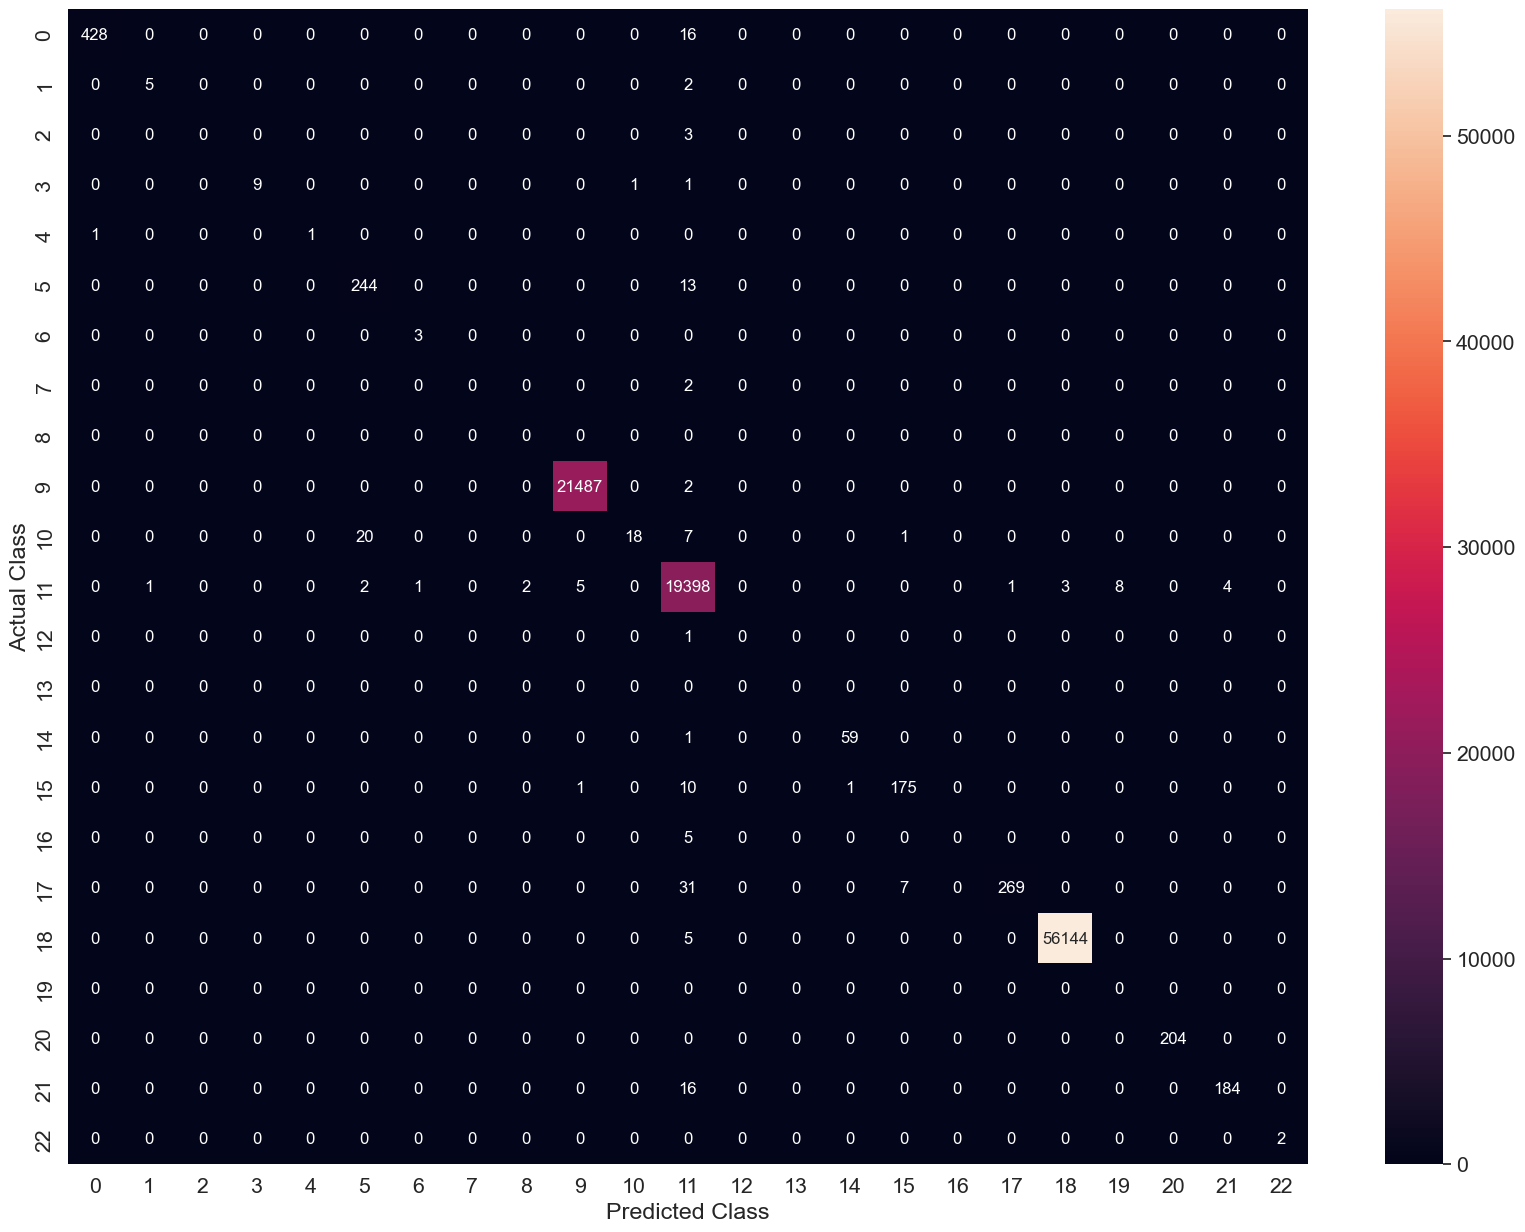

In [49]:
labels2 = np.arange(23)

C = confusion_matrix(y_test, y_test_pred, labels=labels2)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.4)
sns.heatmap(C, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels2, yticklabels=labels2)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
 
plt.show()

# L2 Regularization #

#### Determine heaviest weights for each probe attack ####

c:\Users\steve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\steve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

['diff_srv_rate', 'serror_rate', 'dst_host_serror_rate']
['diff_srv_rate', 'serror_rate', 'dst_host_serror_rate']
['diff_srv_rate', 'serror_rate', 'dst_host_serror_rate']
['diff_srv_rate', 'serror_rate', 'dst_host_serror_rate']


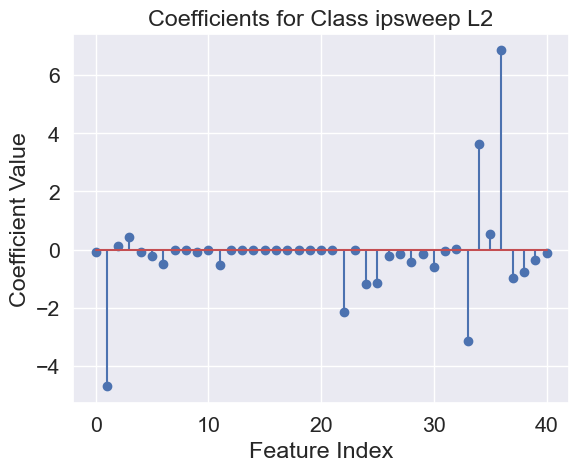

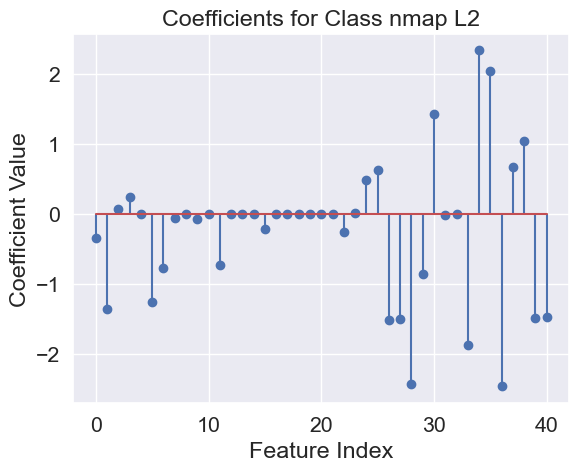

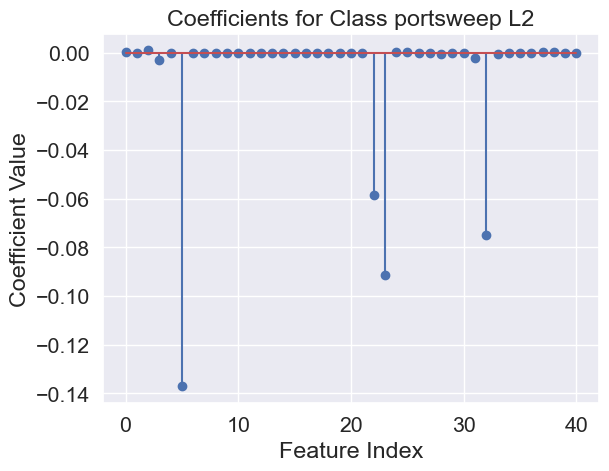

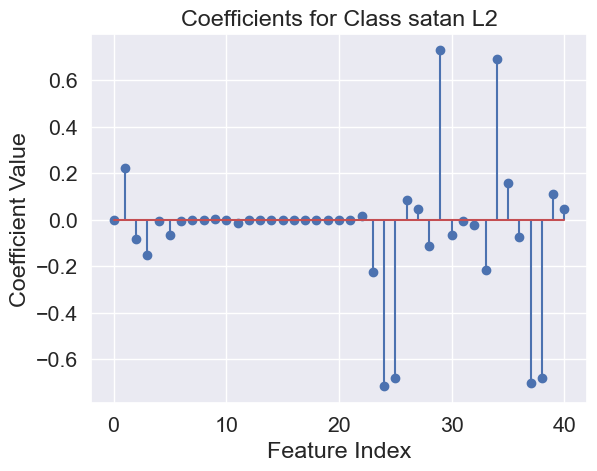

In [50]:
# Index 5: ipsweep
# Index 10: nmap
# Index 15: portsweep
# Index 17: satan

# Create a list to store the coefficients for each classifier
coefficients = []
coefList = [5, 10, 15, 17]

# Fit a logistic regression model for each class
for class_label in coefList:
    # Create a binary label vector for the current class
    y_binary = (y == class_label).astype(int)
    
    # Fit the logistic regression model
    logReg_w = LogisticRegression(penalty='l2', max_iter=100)
    logReg_w.fit(Xw, y_binary.values.ravel())
    
    # Get the coefficients for this classifier and flatten them
    W = logReg_w.coef_.flatten()
    
    # Append the coefficients to the list
    coefficients.append(W)

# Convert the list of coefficients to a NumPy array
coefficients = np.array(coefficients)

# Plot the coefficients for each classifier
for i in range(coefficients.shape[0]):
    plt.figure()
    plt.stem(coefficients[i])
    plt.title(f'Coefficients for Class {IC[coefList[i]]} L2')
    plt.xlabel('Feature Index')
    plt.ylabel('Coefficient Value')

    idx1=np.argsort(np.abs(W))[-1]
    idx2=np.argsort(np.abs(W))[-2]
    idx3=np.argsort(np.abs(W))[-3]

    heavy=[x_labels_w[idx1], x_labels_w[idx2],x_labels_w[idx3]]
    print(heavy)

#### Fit model ####

In [51]:
logReg = LogisticRegression(penalty='l2', max_iter=100)

logReg.fit(X_train, y_train.values.ravel())


c:\Users\steve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Obtain model accuracy scores ####

In [52]:
y_train_pred = logReg.predict(X_train)
y_test_pred = logReg.predict(X_test)

train_score = accuracy_score(y_train, y_train_pred)
test_score = accuracy_score(y_test, y_test_pred)

print("Train score: ", train_score)
print("Test score: ", test_score)

Train score:  0.9753957329662767
Test score:  0.9753856119185458


#### Plot confusion matrix ####

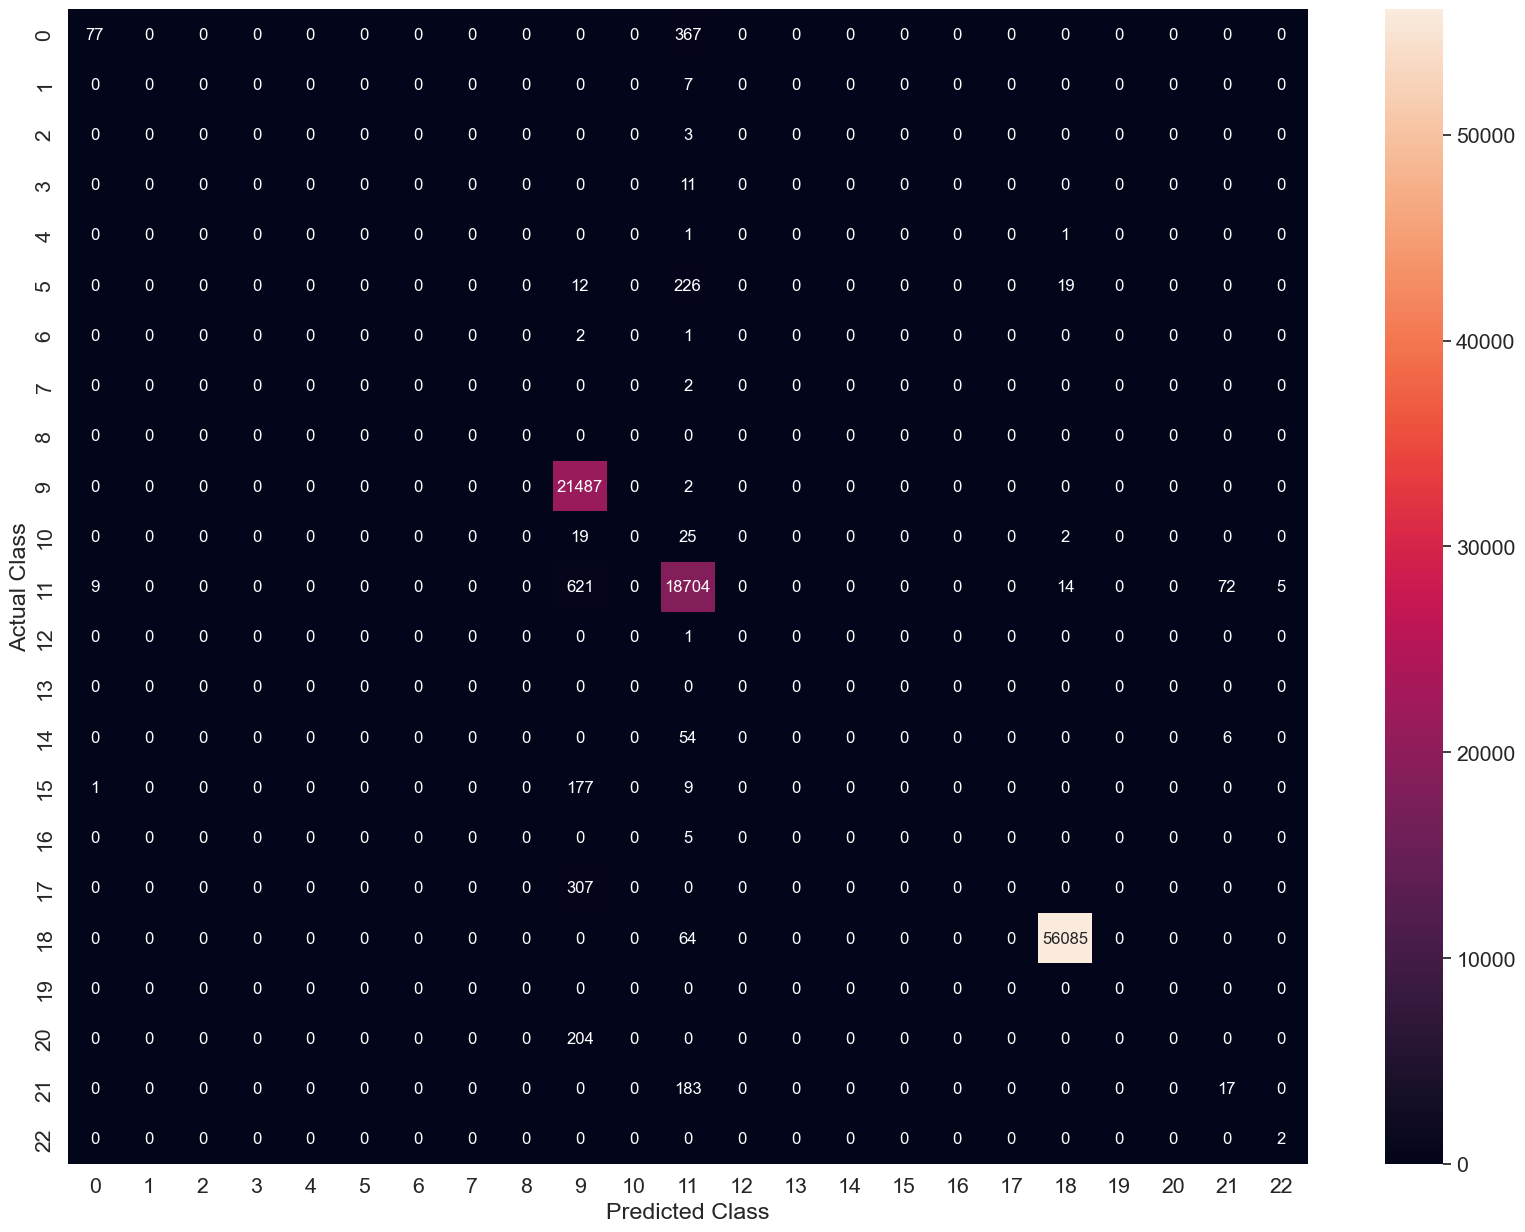

In [53]:
labels2 = np.arange(23)

C = confusion_matrix(y_test, y_test_pred, labels=labels2)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.4)
sns.heatmap(C, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels2, yticklabels=labels2)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
 
plt.show()

# L2 Regularization with different strengths #

## .001 Strength ##

In [54]:
logReg = LogisticRegression(penalty='l2', max_iter=100, C=.001)

logReg.fit(X_train, y_train.values.ravel())

y_train_pred = logReg.predict(X_train)
y_test_pred = logReg.predict(X_test)

train_score = accuracy_score(y_train, y_train_pred)
test_score = accuracy_score(y_test, y_test_pred)

print("Train score: ", train_score)
print("Test score: ", test_score)

c:\Users\steve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train score:  0.9732526011092668
Test score:  0.9733107971337193


## .01 Strength #

In [55]:
logReg = LogisticRegression(penalty='l2', max_iter=100, C=.01)

logReg.fit(X_train, y_train.values.ravel())

y_train_pred = logReg.predict(X_train)
y_test_pred = logReg.predict(X_test)

train_score = accuracy_score(y_train, y_train_pred)
test_score = accuracy_score(y_test, y_test_pred)

print("Train score: ", train_score)
print("Test score: ", test_score)

c:\Users\steve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train score:  0.9764635035018825
Test score:  0.9765495324075948


## .1 Strength ##

In [56]:
logReg = LogisticRegression(penalty='l2', max_iter=100, C=.1)

logReg.fit(X_train, y_train.values.ravel())

y_train_pred = logReg.predict(X_train)
y_test_pred = logReg.predict(X_test)

train_score = accuracy_score(y_train, y_train_pred)
test_score = accuracy_score(y_test, y_test_pred)

print("Train score: ", train_score)
print("Test score: ", test_score)

c:\Users\steve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train score:  0.9801475648759159
Test score:  0.9799805675883567


## 1 Strength ##

In [57]:
logReg = LogisticRegression(penalty='l2', max_iter=100, C=1)

logReg.fit(X_train, y_train.values.ravel())

y_train_pred = logReg.predict(X_train)
y_test_pred = logReg.predict(X_test)

train_score = accuracy_score(y_train, y_train_pred)
test_score = accuracy_score(y_test, y_test_pred)

print("Train score: ", train_score)
print("Test score: ", test_score)

c:\Users\steve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train score:  0.9753957329662767
Test score:  0.9753856119185458


## 10 Strength ##

In [58]:
logReg = LogisticRegression(penalty='l2', max_iter=100, C=10)

logReg.fit(X_train, y_train.values.ravel())

y_train_pred = logReg.predict(X_train)
y_test_pred = logReg.predict(X_test)

train_score = accuracy_score(y_train, y_train_pred)
test_score = accuracy_score(y_test, y_test_pred)

print("Train score: ", train_score)
print("Test score: ", test_score)

Train score:  0.9711373021335169
Test score:  0.9710639245374681


c:\Users\steve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 100 Strength ##

In [59]:
logReg = LogisticRegression(penalty='l2', max_iter=100, C=100)

logReg.fit(X_train, y_train.values.ravel())

y_train_pred = logReg.predict(X_train)
y_test_pred = logReg.predict(X_test)

train_score = accuracy_score(y_train, y_train_pred)
test_score = accuracy_score(y_test, y_test_pred)

print("Train score: ", train_score)
print("Test score: ", test_score)

c:\Users\steve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train score:  0.9750845107485527
Test score:  0.9752641593457755
